# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from pandas import DataFrame
# plt.style.use('seaborn')
# %matplotlib inline

### Data generation
X, y = make_moons(n_samples=5000, noise=0.2)

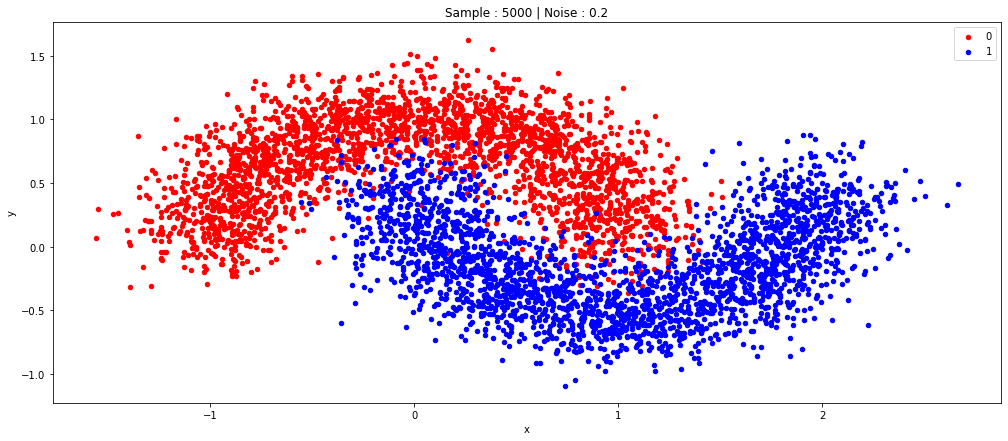

In [2]:
### This function allows to plot the two moons
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

colors = {0:'red', 1:'blue'}
plt.rcParams["figure.figsize"] = (17,7)
fig, ax = plt.subplots()
plt.title('Sample : 5000 | Noise : 0.2')
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

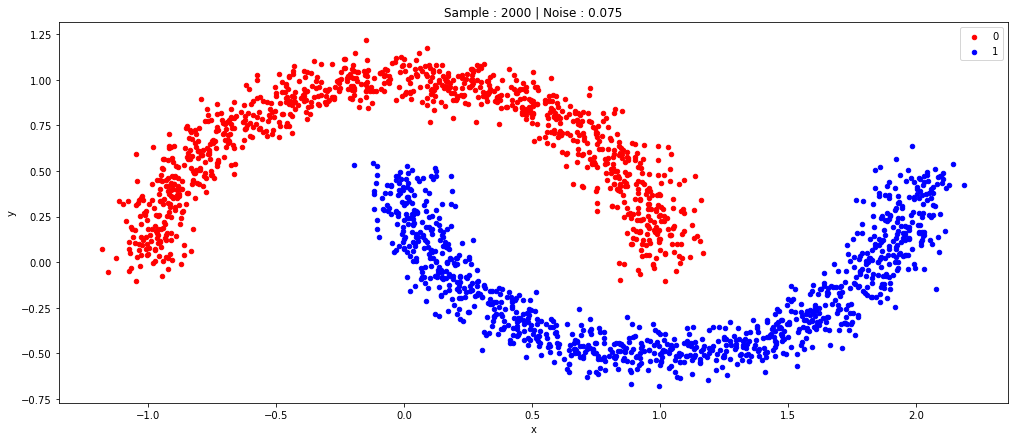

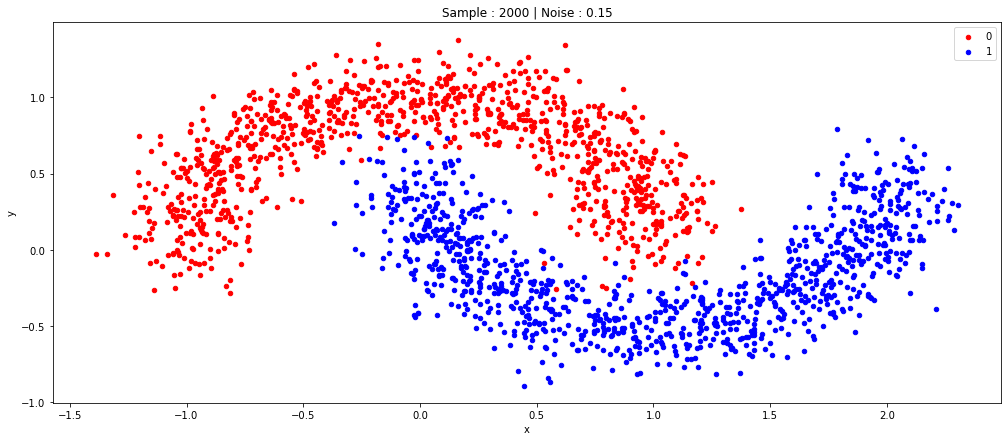

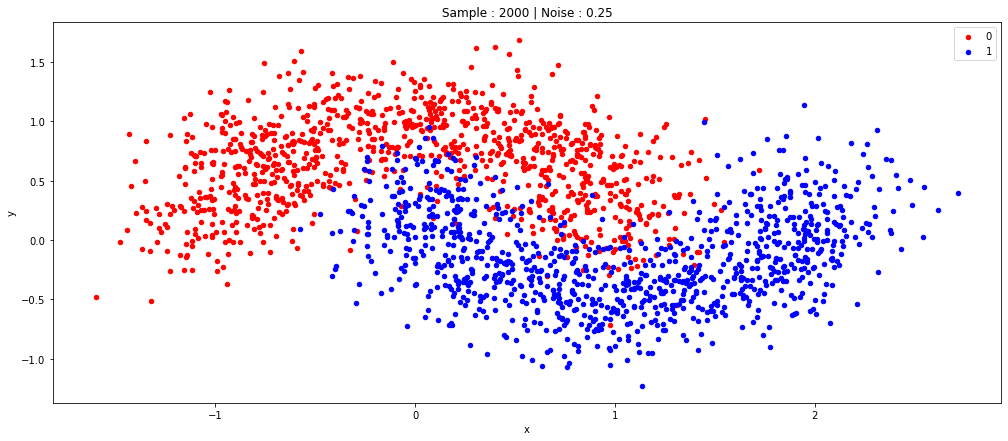

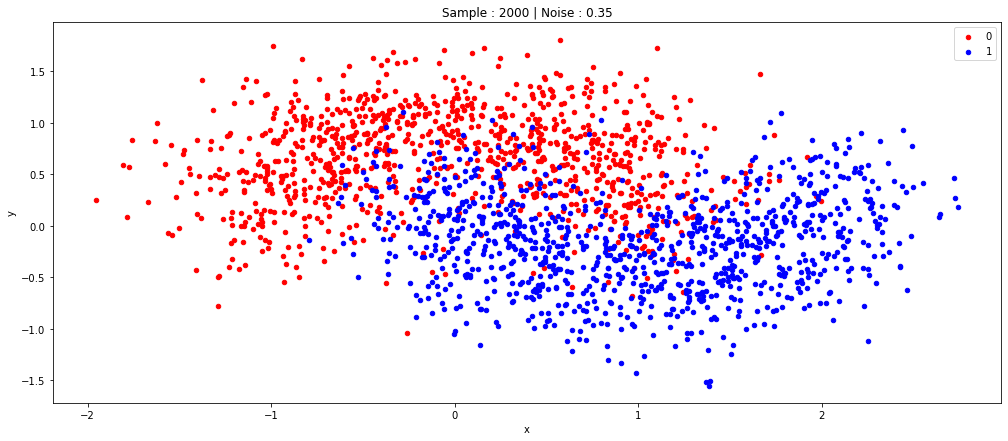

In [3]:
# Création des 'moons'
X1, y1 = make_moons(n_samples=2000, noise=0.075)
X2, y2 = make_moons(n_samples=2000, noise=0.15)
X3, y3 = make_moons(n_samples=2000, noise=0.25)
X4, y4 = make_moons(n_samples=2000, noise=0.35)

# Répartition dans des DataFrame
df1 = DataFrame(dict(x=X1[:,0], y=X1[:,1], label=y1))
df2 = DataFrame(dict(x=X2[:,0], y=X2[:,1], label=y2))
df3 = DataFrame(dict(x=X3[:,0], y=X3[:,1], label=y3))
df4 = DataFrame(dict(x=X4[:,0], y=X4[:,1], label=y4))

# Plot graph_1
_, ax = plt.subplots()
plt.title('Sample : 2000 | Noise : 0.075')
grouped = df1.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# Plot graph_2
_, ax = plt.subplots()
plt.title('Sample : 2000 | Noise : 0.15')
grouped = df2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# Plot graph_3
_, ax = plt.subplots()
plt.title('Sample : 2000 | Noise : 0.25')
grouped = df3.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

# Plot graph_4
_, ax = plt.subplots()
plt.title('Sample : 2000 | Noise : 0.35')
grouped = df4.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [4]:
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=250, noise=0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [5]:
from keras import layers, Model, optimizers, regularizers

input = layers.Input(shape=(2,))
inter = layers.Dense(5, activation='relu')(input)
output = layers.Dense(1, activation='sigmoid')(inter)

In [6]:
def initialize_model():
    model = Model(input, output)
    
    model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
    
    return model


model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [8]:
history = model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test),
                    batch_size = 100, epochs = 50)

Epoch 1/50
2/2 [==============================] - 0s 116ms/step - loss: 0.5421 - accuracy: 0.7371 - val_loss: 0.5199 - val_accuracy: 0.8133
Epoch 2/50
2/2 [==============================] - 0s 19ms/step - loss: 0.5407 - accuracy: 0.7371 - val_loss: 0.5186 - val_accuracy: 0.8133
Epoch 3/50
2/2 [==============================] - 0s 19ms/step - loss: 0.5393 - accuracy: 0.7314 - val_loss: 0.5173 - val_accuracy: 0.8133
Epoch 4/50
2/2 [==============================] - 0s 19ms/step - loss: 0.5380 - accuracy: 0.7314 - val_loss: 0.5160 - val_accuracy: 0.8000
Epoch 5/50
2/2 [==============================] - 0s 19ms/step - loss: 0.5366 - accuracy: 0.7314 - val_loss: 0.5147 - val_accuracy: 0.8000
Epoch 6/50
2/2 [==============================] - 0s 20ms/step - loss: 0.5352 - accuracy: 0.7257 - val_loss: 0.5134 - val_accuracy: 0.8133
Epoch 7/50
2/2 [==============================] - 0s 19ms/step - loss: 0.5338 - accuracy: 0.7314 - val_loss: 0.5122 - val_accuracy: 0.8133
Epoch 8/50
2/2 [==========

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [9]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.functional.Functional at 0x2a65a4a2dc0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.5421352982521057,
   0.5407415628433228,
   0.539349377155304,
   0.5380064249038696,
   0.5366284251213074,
   0.5352389216423035,
   0.5338179469108582,
   0.5325258374214172,
   0.5311562418937683,
   0.5298736691474915,
   0.5285950899124146,
   0.5272969007492065,
   0.5259394645690918,
   0.5247460603713989,
   0.5234190821647644,
   0.5221291184425354,
   0.5207950472831726,
   0.5195375084877014,
   0.5182828903198242,
   0.517114520072937,
   0.5158172845840454,
   0.5146000385284424,
   0.5133432149887085,
   0.5120871663093567,
   0.5108810663223267,
   0.5096940398216248,
   0.5083865523338318,
   0.5072414875030518,
   0.5060240626335144,
   0.5047986507415771,
   0.503581702709198,
   0.5024370551109314,
   0.5012417435646057,
   0.5000799298286438,
   0.4988802671432495,
   0.4977250099182129,
   0.49

❓ Plot the history of the train loss using the following function

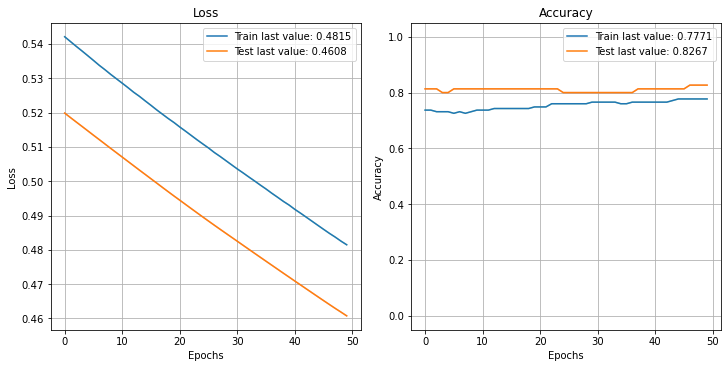

In [10]:
from plot_keras_history import plot_history

plot_history(history)
plt.show()

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [11]:
y_pred = model.predict(X_test)

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [12]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.8267


[0.46075260639190674, 0.8266666531562805]

- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [13]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f"l'accuracy est de {accuracy}")

3/3 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.8267
l'accuracy est de 0.8266666531562805


❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

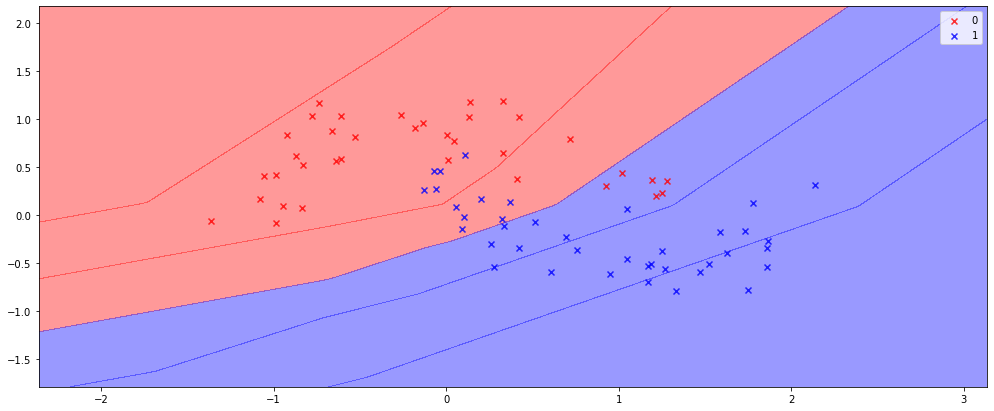

In [14]:
from utils.plots import plot_decision_regions


plot_decision_regions(X_test, y_test, model)

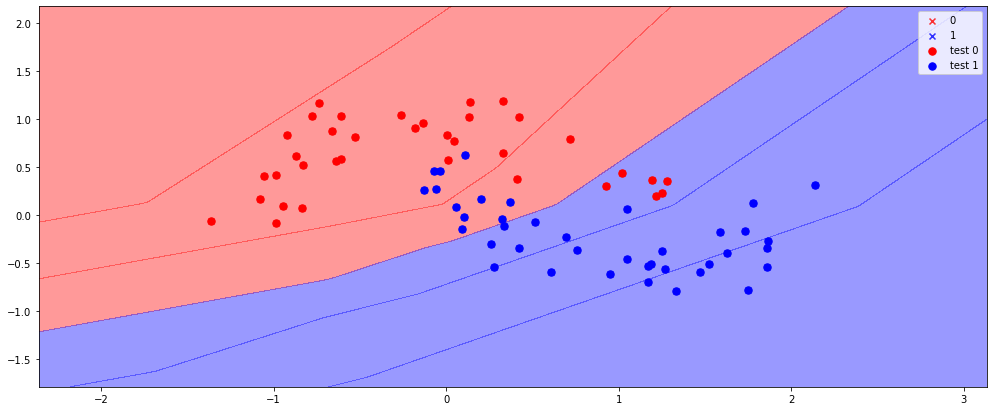

In [15]:
plot_decision_regions(X_test, y_test, model, test_idx=True)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [16]:
model = initialize_model()

history = model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test),
                    batch_size = 100, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 92ms/step - loss: 0.4803 - accuracy: 0.7771 - val_loss: 0.4596 - val_accuracy: 0.8267
Epoch 2/500
2/2 [==============================] - 0s 20ms/step - loss: 0.4791 - accuracy: 0.7771 - val_loss: 0.4585 - val_accuracy: 0.8267
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 0.4779 - accuracy: 0.7771 - val_loss: 0.4574 - val_accuracy: 0.8267
Epoch 4/500
2/2 [==============================] - 0s 21ms/step - loss: 0.4768 - accuracy: 0.7829 - val_loss: 0.4563 - val_accuracy: 0.8267
Epoch 5/500
2/2 [==============================] - 0s 17ms/step - loss: 0.4756 - accuracy: 0.7829 - val_loss: 0.4552 - val_accuracy: 0.8267
Epoch 6/500
2/2 [==============================] - 0s 19ms/step - loss: 0.4744 - accuracy: 0.7829 - val_loss: 0.4541 - val_accuracy: 0.8267
Epoch 7/500
2/2 [==============================] - 0s 17ms/step - loss: 0.4733 - accuracy: 0.7829 - val_loss: 0.4530 - val_accuracy: 0.8267
Epoch 8/500
2/2 [===

2/2 [==============================] - 0s 18ms/step - loss: 0.4216 - accuracy: 0.8171 - val_loss: 0.4040 - val_accuracy: 0.8133
Epoch 60/500
2/2 [==============================] - 0s 19ms/step - loss: 0.4207 - accuracy: 0.8171 - val_loss: 0.4033 - val_accuracy: 0.8133
Epoch 61/500
2/2 [==============================] - 0s 20ms/step - loss: 0.4199 - accuracy: 0.8171 - val_loss: 0.4025 - val_accuracy: 0.8133
Epoch 62/500
2/2 [==============================] - 0s 20ms/step - loss: 0.4191 - accuracy: 0.8171 - val_loss: 0.4018 - val_accuracy: 0.8133
Epoch 63/500
2/2 [==============================] - 0s 17ms/step - loss: 0.4183 - accuracy: 0.8171 - val_loss: 0.4011 - val_accuracy: 0.8000
Epoch 64/500
2/2 [==============================] - 0s 17ms/step - loss: 0.4175 - accuracy: 0.8171 - val_loss: 0.4003 - val_accuracy: 0.8000
Epoch 65/500
2/2 [==============================] - 0s 18ms/step - loss: 0.4167 - accuracy: 0.8171 - val_loss: 0.3996 - val_accuracy: 0.8000
Epoch 66/500
2/2 [========

Epoch 117/500
2/2 [==============================] - 0s 19ms/step - loss: 0.3816 - accuracy: 0.8229 - val_loss: 0.3688 - val_accuracy: 0.8000
Epoch 118/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3811 - accuracy: 0.8229 - val_loss: 0.3683 - val_accuracy: 0.8000
Epoch 119/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3806 - accuracy: 0.8229 - val_loss: 0.3678 - val_accuracy: 0.8000
Epoch 120/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3800 - accuracy: 0.8229 - val_loss: 0.3674 - val_accuracy: 0.8000
Epoch 121/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3795 - accuracy: 0.8229 - val_loss: 0.3669 - val_accuracy: 0.8000
Epoch 122/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3790 - accuracy: 0.8229 - val_loss: 0.3665 - val_accuracy: 0.8000
Epoch 123/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3784 - accuracy: 0.8229 - val_loss: 0.3660 - val_accuracy: 0.8000
Epoch 

2/2 [==============================] - 0s 16ms/step - loss: 0.3557 - accuracy: 0.8343 - val_loss: 0.3485 - val_accuracy: 0.8133
Epoch 175/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3553 - accuracy: 0.8343 - val_loss: 0.3483 - val_accuracy: 0.8133
Epoch 176/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3549 - accuracy: 0.8343 - val_loss: 0.3480 - val_accuracy: 0.8133
Epoch 177/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3546 - accuracy: 0.8343 - val_loss: 0.3478 - val_accuracy: 0.8133
Epoch 178/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3542 - accuracy: 0.8343 - val_loss: 0.3475 - val_accuracy: 0.8133
Epoch 179/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3538 - accuracy: 0.8343 - val_loss: 0.3473 - val_accuracy: 0.8133
Epoch 180/500
2/2 [==============================] - 0s 19ms/step - loss: 0.3535 - accuracy: 0.8343 - val_loss: 0.3471 - val_accuracy: 0.8133
Epoch 181/500
2/2 [=

Epoch 232/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3368 - accuracy: 0.8457 - val_loss: 0.3371 - val_accuracy: 0.8133
Epoch 233/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3365 - accuracy: 0.8457 - val_loss: 0.3369 - val_accuracy: 0.8133
Epoch 234/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3362 - accuracy: 0.8457 - val_loss: 0.3368 - val_accuracy: 0.8133
Epoch 235/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3358 - accuracy: 0.8457 - val_loss: 0.3366 - val_accuracy: 0.8133
Epoch 236/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3355 - accuracy: 0.8457 - val_loss: 0.3364 - val_accuracy: 0.8133
Epoch 237/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3352 - accuracy: 0.8514 - val_loss: 0.3362 - val_accuracy: 0.8267
Epoch 238/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3349 - accuracy: 0.8514 - val_loss: 0.3361 - val_accuracy: 0.8267
Epoch 

Epoch 290/500
2/2 [==============================] - 0s 18ms/step - loss: 0.3176 - accuracy: 0.8571 - val_loss: 0.3296 - val_accuracy: 0.8400
Epoch 291/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3174 - accuracy: 0.8571 - val_loss: 0.3295 - val_accuracy: 0.8400
Epoch 292/500
2/2 [==============================] - 0s 18ms/step - loss: 0.3171 - accuracy: 0.8571 - val_loss: 0.3294 - val_accuracy: 0.8400
Epoch 293/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3168 - accuracy: 0.8571 - val_loss: 0.3293 - val_accuracy: 0.8400
Epoch 294/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3165 - accuracy: 0.8571 - val_loss: 0.3291 - val_accuracy: 0.8400
Epoch 295/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3162 - accuracy: 0.8571 - val_loss: 0.3289 - val_accuracy: 0.8400
Epoch 296/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3159 - accuracy: 0.8571 - val_loss: 0.3287 - val_accuracy: 0.8400
Epoch 

Epoch 348/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3047 - accuracy: 0.8629 - val_loss: 0.3203 - val_accuracy: 0.8400
Epoch 349/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3046 - accuracy: 0.8629 - val_loss: 0.3202 - val_accuracy: 0.8400
Epoch 350/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3044 - accuracy: 0.8686 - val_loss: 0.3200 - val_accuracy: 0.8400
Epoch 351/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3043 - accuracy: 0.8686 - val_loss: 0.3199 - val_accuracy: 0.8400
Epoch 352/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3042 - accuracy: 0.8686 - val_loss: 0.3198 - val_accuracy: 0.8400
Epoch 353/500
2/2 [==============================] - 0s 17ms/step - loss: 0.3040 - accuracy: 0.8686 - val_loss: 0.3197 - val_accuracy: 0.8400
Epoch 354/500
2/2 [==============================] - 0s 16ms/step - loss: 0.3039 - accuracy: 0.8686 - val_loss: 0.3196 - val_accuracy: 0.8400
Epoch 

Epoch 406/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2980 - accuracy: 0.8743 - val_loss: 0.3136 - val_accuracy: 0.8533
Epoch 407/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2978 - accuracy: 0.8743 - val_loss: 0.3135 - val_accuracy: 0.8533
Epoch 408/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2977 - accuracy: 0.8743 - val_loss: 0.3134 - val_accuracy: 0.8533
Epoch 409/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2976 - accuracy: 0.8743 - val_loss: 0.3133 - val_accuracy: 0.8533
Epoch 410/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2975 - accuracy: 0.8686 - val_loss: 0.3132 - val_accuracy: 0.8533
Epoch 411/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2974 - accuracy: 0.8686 - val_loss: 0.3131 - val_accuracy: 0.8533
Epoch 412/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2974 - accuracy: 0.8686 - val_loss: 0.3130 - val_accuracy: 0.8533
Epoch 

Epoch 464/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2927 - accuracy: 0.8686 - val_loss: 0.3080 - val_accuracy: 0.8667
Epoch 465/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2927 - accuracy: 0.8686 - val_loss: 0.3079 - val_accuracy: 0.8667
Epoch 466/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2926 - accuracy: 0.8686 - val_loss: 0.3078 - val_accuracy: 0.8667
Epoch 467/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2925 - accuracy: 0.8686 - val_loss: 0.3077 - val_accuracy: 0.8667
Epoch 468/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2924 - accuracy: 0.8686 - val_loss: 0.3077 - val_accuracy: 0.8667
Epoch 469/500
2/2 [==============================] - 0s 18ms/step - loss: 0.2923 - accuracy: 0.8686 - val_loss: 0.3076 - val_accuracy: 0.8667
Epoch 470/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2922 - accuracy: 0.8686 - val_loss: 0.3075 - val_accuracy: 0.8667
Epoch 

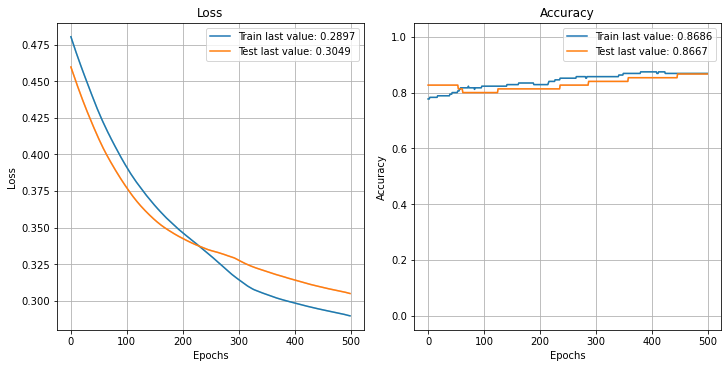

In [17]:
plot_history(history)
plt.show()

❓ Did the test accuracy improve?

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [18]:
input = layers.Input(shape=(2,))
inter = layers.Dense(20, activation='relu')(input)
inter = layers.Dense(10, activation='relu')(inter)
inter = layers.Dense(5, activation='relu')(inter)
output = layers.Dense(1, activation='sigmoid')(inter)

model = initialize_model()

❓ What is the number of parameters of your new model?

In [19]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 20)                60        
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

In [20]:
history = model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test),
                    batch_size = 100, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 96ms/step - loss: 0.6922 - accuracy: 0.6229 - val_loss: 0.6916 - val_accuracy: 0.6267
Epoch 2/500
2/2 [==============================] - 0s 20ms/step - loss: 0.6904 - accuracy: 0.5657 - val_loss: 0.6906 - val_accuracy: 0.8267
Epoch 3/500
2/2 [==============================] - 0s 20ms/step - loss: 0.6889 - accuracy: 0.7714 - val_loss: 0.6891 - val_accuracy: 0.8400
Epoch 4/500
2/2 [==============================] - 0s 20ms/step - loss: 0.6869 - accuracy: 0.7943 - val_loss: 0.6868 - val_accuracy: 0.8533
Epoch 5/500
2/2 [==============================] - 0s 19ms/step - loss: 0.6839 - accuracy: 0.8000 - val_loss: 0.6835 - val_accuracy: 0.8667
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 0.6809 - accuracy: 0.8171 - val_loss: 0.6800 - val_accuracy: 0.8667
Epoch 7/500
2/2 [==============================] - 0s 18ms/step - loss: 0.6777 - accuracy: 0.8171 - val_loss: 0.6760 - val_accuracy: 0.8933
Epoch 8/500
2/2 [===

Epoch 59/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4453 - accuracy: 0.8286 - val_loss: 0.4309 - val_accuracy: 0.8267
Epoch 60/500
2/2 [==============================] - 0s 17ms/step - loss: 0.4403 - accuracy: 0.8286 - val_loss: 0.4255 - val_accuracy: 0.8267
Epoch 61/500
2/2 [==============================] - 0s 19ms/step - loss: 0.4350 - accuracy: 0.8343 - val_loss: 0.4202 - val_accuracy: 0.8267
Epoch 62/500
2/2 [==============================] - 0s 19ms/step - loss: 0.4301 - accuracy: 0.8343 - val_loss: 0.4148 - val_accuracy: 0.8267
Epoch 63/500
2/2 [==============================] - 0s 18ms/step - loss: 0.4250 - accuracy: 0.8343 - val_loss: 0.4096 - val_accuracy: 0.8267
Epoch 64/500
2/2 [==============================] - 0s 19ms/step - loss: 0.4199 - accuracy: 0.8343 - val_loss: 0.4045 - val_accuracy: 0.8267
Epoch 65/500
2/2 [==============================] - 0s 17ms/step - loss: 0.4150 - accuracy: 0.8343 - val_loss: 0.3994 - val_accuracy: 0.8400
Epoch 66/500


Epoch 117/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2562 - accuracy: 0.8914 - val_loss: 0.2348 - val_accuracy: 0.9067
Epoch 118/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2545 - accuracy: 0.8914 - val_loss: 0.2329 - val_accuracy: 0.9067
Epoch 119/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2529 - accuracy: 0.8914 - val_loss: 0.2311 - val_accuracy: 0.9067
Epoch 120/500
2/2 [==============================] - 0s 18ms/step - loss: 0.2513 - accuracy: 0.8971 - val_loss: 0.2292 - val_accuracy: 0.9067
Epoch 121/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2498 - accuracy: 0.8971 - val_loss: 0.2274 - val_accuracy: 0.9067
Epoch 122/500
2/2 [==============================] - 0s 16ms/step - loss: 0.2483 - accuracy: 0.8971 - val_loss: 0.2256 - val_accuracy: 0.9067
Epoch 123/500
2/2 [==============================] - 0s 17ms/step - loss: 0.2467 - accuracy: 0.8971 - val_loss: 0.2238 - val_accuracy: 0.9067
Epoch 

Epoch 175/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1717 - accuracy: 0.9314 - val_loss: 0.1473 - val_accuracy: 0.9333
Epoch 176/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1703 - accuracy: 0.9314 - val_loss: 0.1460 - val_accuracy: 0.9333
Epoch 177/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1689 - accuracy: 0.9314 - val_loss: 0.1448 - val_accuracy: 0.9333
Epoch 178/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1674 - accuracy: 0.9314 - val_loss: 0.1438 - val_accuracy: 0.9467
Epoch 179/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1659 - accuracy: 0.9314 - val_loss: 0.1429 - val_accuracy: 0.9467
Epoch 180/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1646 - accuracy: 0.9314 - val_loss: 0.1421 - val_accuracy: 0.9467
Epoch 181/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1634 - accuracy: 0.9314 - val_loss: 0.1413 - val_accuracy: 0.9467
Epoch 

Epoch 233/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1087 - accuracy: 0.9600 - val_loss: 0.1080 - val_accuracy: 0.9600
Epoch 234/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1078 - accuracy: 0.9600 - val_loss: 0.1073 - val_accuracy: 0.9600
Epoch 235/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1071 - accuracy: 0.9600 - val_loss: 0.1066 - val_accuracy: 0.9600
Epoch 236/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1064 - accuracy: 0.9600 - val_loss: 0.1058 - val_accuracy: 0.9600
Epoch 237/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1056 - accuracy: 0.9600 - val_loss: 0.1053 - val_accuracy: 0.9600
Epoch 238/500
2/2 [==============================] - 0s 16ms/step - loss: 0.1051 - accuracy: 0.9600 - val_loss: 0.1048 - val_accuracy: 0.9600
Epoch 239/500
2/2 [==============================] - 0s 17ms/step - loss: 0.1044 - accuracy: 0.9600 - val_loss: 0.1049 - val_accuracy: 0.9600
Epoch 

Epoch 291/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0965 - val_accuracy: 0.9733
Epoch 292/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0745 - accuracy: 0.9771 - val_loss: 0.0960 - val_accuracy: 0.9733
Epoch 293/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0741 - accuracy: 0.9771 - val_loss: 0.0959 - val_accuracy: 0.9733
Epoch 294/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0737 - accuracy: 0.9771 - val_loss: 0.0957 - val_accuracy: 0.9733
Epoch 295/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0733 - accuracy: 0.9771 - val_loss: 0.0959 - val_accuracy: 0.9733
Epoch 296/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0729 - accuracy: 0.9771 - val_loss: 0.0958 - val_accuracy: 0.9733
Epoch 297/500
2/2 [==============================] - 0s 18ms/step - loss: 0.0725 - accuracy: 0.9771 - val_loss: 0.0960 - val_accuracy: 0.9733
Epoch 

Epoch 349/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0575 - accuracy: 0.9829 - val_loss: 0.0950 - val_accuracy: 0.9733
Epoch 350/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0573 - accuracy: 0.9829 - val_loss: 0.0953 - val_accuracy: 0.9733
Epoch 351/500
2/2 [==============================] - 0s 15ms/step - loss: 0.0571 - accuracy: 0.9829 - val_loss: 0.0958 - val_accuracy: 0.9733
Epoch 352/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0569 - accuracy: 0.9829 - val_loss: 0.0962 - val_accuracy: 0.9733
Epoch 353/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0566 - accuracy: 0.9829 - val_loss: 0.0964 - val_accuracy: 0.9733
Epoch 354/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0564 - accuracy: 0.9829 - val_loss: 0.0960 - val_accuracy: 0.9733
Epoch 355/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0562 - accuracy: 0.9829 - val_loss: 0.0960 - val_accuracy: 0.9733
Epoch 

Epoch 407/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0472 - accuracy: 0.9886 - val_loss: 0.0961 - val_accuracy: 0.9733
Epoch 408/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0471 - accuracy: 0.9886 - val_loss: 0.0964 - val_accuracy: 0.9733
Epoch 409/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0470 - accuracy: 0.9886 - val_loss: 0.0965 - val_accuracy: 0.9733
Epoch 410/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0469 - accuracy: 0.9886 - val_loss: 0.0964 - val_accuracy: 0.9733
Epoch 411/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0467 - accuracy: 0.9886 - val_loss: 0.0961 - val_accuracy: 0.9733
Epoch 412/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0468 - accuracy: 0.9886 - val_loss: 0.0963 - val_accuracy: 0.9733
Epoch 413/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0464 - accuracy: 0.9886 - val_loss: 0.0957 - val_accuracy: 0.9733
Epoch 

2/2 [==============================] - 0s 16ms/step - loss: 0.0406 - accuracy: 0.9886 - val_loss: 0.0994 - val_accuracy: 0.9733
Epoch 465/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0404 - accuracy: 0.9886 - val_loss: 0.0992 - val_accuracy: 0.9733
Epoch 466/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0403 - accuracy: 0.9886 - val_loss: 0.0987 - val_accuracy: 0.9733
Epoch 467/500
2/2 [==============================] - 0s 16ms/step - loss: 0.0402 - accuracy: 0.9886 - val_loss: 0.0988 - val_accuracy: 0.9733
Epoch 468/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0401 - accuracy: 0.9886 - val_loss: 0.0992 - val_accuracy: 0.9733
Epoch 469/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0400 - accuracy: 0.9886 - val_loss: 0.0993 - val_accuracy: 0.9733
Epoch 470/500
2/2 [==============================] - 0s 17ms/step - loss: 0.0399 - accuracy: 0.9886 - val_loss: 0.0998 - val_accuracy: 0.9733
Epoch 471/500
2/2 [=

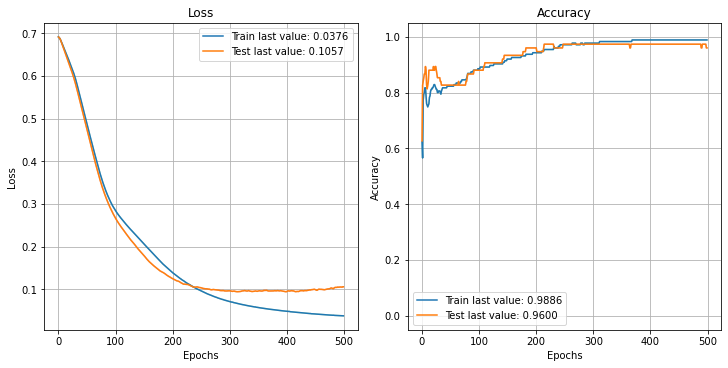

In [21]:
plot_history(history)
plt.show()

❓ Do you think we have overfitted on the noise? Check it out below